# How model skill depends on MESHS threshold 

Here, we explore how model skill metrics depend on MESHS threshold and plot Figure 5 of the paper.

In [1]:
import sys, os
from pathlib import Path
#add path to path of current skript, where also utility.py lies
sys.path.append(Path.cwd().absolute())
#own utility functions
from utility import data_dir, read_at_centroid_data, compute_verification_stats, plot_skill_haz_threshold

#others
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib 

/home/raphael/miniforge3/envs/climada_env_3.9/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


Specify hazard data, unit, croptypes and input and output directories. (here, entries in list croptypes are merged to one crop type, so ```['wheat','maize','barley','rapeseed']``` is used to get aggregate crop class field crops. 

In [2]:
#%% SETUP
variable='MESHS'
unit='mm'
croptypes_lists=[['wheat','maize','barley','rapeseed'],['grapevine']]
datadir = f"{data_dir}/data_at_centroid/"
figdir = '/home/raphael/scClim/climada/fig/'

Read at centroid data (i.e. the information on exposure, damage, and hail hazard at each centroid for each event.) for specified crops

In [3]:
at_centroid_data_crops={}
for croptypes in croptypes_lists:
    at_centroid_data, croptype = read_at_centroid_data(datadir,croptypes,variable=variable)
    at_centroid_data_crops[croptype] = at_centroid_data

Plot the figure

/home/raphael/climada_papers/202403_crop_hail_damage_footprint/utility.py:1184: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  npred=np.int64(np.sum(A[1::]+B[1::]).values[0])
/home/raphael/miniforge3/envs/climada_env_3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/raphael/climada_papers/202403_crop_hail_damage_footprint/utility.py:1184: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  n

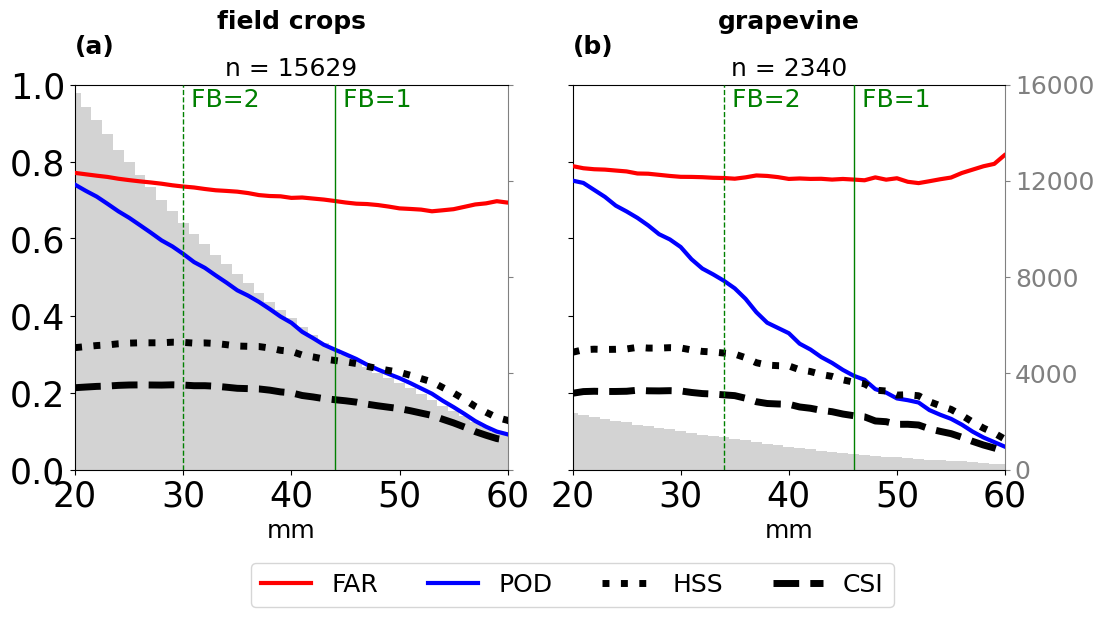

In [4]:
fig,ax=plot_skill_haz_threshold(at_centroid_data_crops['wheat_maize_barley_rapeseed'],at_centroid_data_crops['grapevine'],variable,unit, figdir, thresh=0)


Save the Figure

In [5]:
fig.savefig(f'{figdir}/Figure_02_two_crops.png',dpi=300,bbox_inches='tight')
fig.savefig(f'{figdir}/Figure_02_two_crops.pdf',dpi=300,bbox_inches='tight')